# Premier League Club Investment Analysis

### Context
A certain company aims to invest in the premier league. The management of Company ABC aims to invest in some of the top-performing clubs in the English Premier League. To aid in their decision-making process, the analytics department has been tasked with creating a comprehensive report on the performance of various clubs. However, some of the more established clubs have already been owned by the competitors. As a result, Company ABC wishes to identify the clubs they can approach and potentially invest to ensure a successful and profitable deal.

Data: A CSV file containing the information of all the teams that have participated in the English Premier League

Data Dictionary:

* Club: Name of the Football Club
* Matches Played: No.of matches played in the premier league
* Win: No.of matches won
* Loss: No.of matches lost
* Drawn: No.of matches that ended on a draw
* Goals: No.of Goals scored by the team in the premier league
* Clean Sheets: No.of matches a club has prevented the opposite team from scoring 
* Team Launch: The year in which the club was founded
* Winners: No.of times a club has won the league
* Runners Up: No.of times a club has finished as the runners up in the league

In [2]:
# Importing the required libraries
import numpy as np
import pandas as pd


In [3]:
# Reading the CSV File/ Dataset
dataf = pd.read_csv(r"C:\Users\Akshit\Desktop\DA Workshop\Premier-League-Club-Investment-Analysis-main\Premier League Final Data.csv")


In [4]:
# Getting the first five rows of the dataset
dataf.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up
0,1Arsenal,1182,642,252,288,2089,448,1886,3.0,6
1,2Aston Villa,1062,368,399,295,1306,311,1874,0.0,1
2,3Birmingham City,266,73,111,82,273,66,1875,0.0,NaN
3,4Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1
4,5Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0


In [5]:
# Getting the last five rows of the dataset
dataf.tail()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up
36,37West Ham United,1025,343,423,259,1262,266,1895,NaN,0
37,38Wigan Athletic,304,85,143,76,316,73,1932,NaN,0
38,39Wimbledon,316,99,123,94,384,79,Jul 1868,NaN,0
39,40Wolverhampton Wanderers,334,98,151,85,353,75,1877,0.0,0
40,41Hull City,190,41,101,48,181,58,1904,NaN,0


We are able to infer that the dataset contains 10 columns in which the first column represents the clubs while it's corresponding columns provide information related to these clubs

We also notice that certain columns have undesirable values, the club column has numbers which might be a serial number, while team launch is inconsistent where some values are not just numbers and the winner has NaN value which must be converted to a number to perform analysis 

In [6]:
# Size of data
dataf.shape

(41, 10)

The Data set contains 41 rows and 10 columns

In [7]:
# Getting  ore information related to datatypes and non null values in the dataframe 
dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            41 non-null     object 
 1   Matches Played  41 non-null     int64  
 2   Win             41 non-null     int64  
 3   Loss            41 non-null     int64  
 4   Drawn           41 non-null     int64  
 5   Goals           41 non-null     int64  
 6   Clean Sheets    41 non-null     int64  
 7   TeamLaunch      41 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      23 non-null     object 
dtypes: float64(1), int64(6), object(3)
memory usage: 3.3+ KB


We notice that there are some non null values present in a few columns. Winners column has 16 null values and runnersup column has 18 null values. We also notice that Runnersup is of object type, to perform analysis we would require it to be a number type.

## Cleaning the dataset


In [8]:
#cleaning the club column
dataf['Club'] = dataf['Club'].str.replace('\d+','')

C:\Users\Akshit\AppData\Local\Temp\ipykernel_9020\1434033354.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  dataf['Club'] = dataf['Club'].str.replace('\d+','')


In [9]:
#After cleaning the Club Column
dataf

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up
0,Arsenal,1182,642,252,288,2089,448,1886,3.0,6
1,Aston Villa,1062,368,399,295,1306,311,1874,0.0,1
2,Birmingham City,266,73,111,82,273,66,1875,0.0,NaN
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,-
7,Burnley,304,83,145,76,300,78,1882,0.0,-
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,NaN
9,Chelsea,1182,628,261,293,2002,473,1905,5.0,4


We observe that the Club Column has been cleaned. We can now proceed further on our analysis

In [10]:
# Checking the null values of the Winners column
dataf['Winners'].isnull()

0     False
1     False
2     False
3     False
4     False
5     False
6     False
7     False
8     False
9     False
10    False
11    False
12    False
13    False
14    False
15    False
16    False
17    False
18    False
19    False
20    False
21    False
22    False
23    False
24     True
25     True
26     True
27     True
28     True
29     True
30     True
31     True
32     True
33     True
34     True
35     True
36     True
37     True
38     True
39    False
40     True
Name: Winners, dtype: bool

In [11]:
# Alternate way to check if null values are present
dataf['Winners'].isnull().any()

True

In [12]:
dataf['Winners'].value_counts()
# Returns the unique values and their frequency present in the column

0.0     18
1.0      3
3.0      1
5.0      1
6.0      1
13.0     1
Name: Winners, dtype: int64

Upon examining this result we understand that there are 25 Non null values. We also are able to notice that there are 18 clubs that have never won the league since they represent a 0 value in the winner column. We see that 3 teams have won the league once, 1 team thrice, 1 team five times, 1 team six times, and 1 team 13 times.

We notice that there have been 30 Premier league tournaments held from 1992-2022. We infer this on the basis domain knowledge. 

Total = teams X no.of times they have won

Total = 3X1 + 1X3 + 1X5 + 1X6 + 1X13 = 30

We see that the total obtained based on our data and the info based on domain knowledge is same and hence it is consistent
This implies that other clubs have not won the league, thus it would be appropriate to replace the Winners column with zeros for all the null values, as these clubs have not won the league. This data cleaning step ensures that the dataset accurately reflects the historical performance of each club in the premier league.

In [64]:
dataf['Winners'].fillna(0,inplace=True)

In [13]:
# Checking null values in the runnersup column since we observed the null value
dataf['Runners-up'].isnull().any()

True

In [14]:
dataf['Runners-up'].value_counts()

0    11
1     3
-     3
6     1
4     1
5     1
3     1
7     1
2     1
Name: Runners-up, dtype: int64

Teams have different number of runners-up finishes. We observe that 3 teams have been runnersup once each, 1 team has been runnerup 6 times, 1 team has been runnerup 4 times, 1 team has been runnersup 5 times, 1 team has been runnerup 3 times, 1 team has been runnerup 7 times, 1 team has been runnerup for 2 times. We see that this adds up to a total of 30. But we notice the data to be inconsistent with some values as null,0,-. We need to clean this to make our data consistent

Total Runnerup = no.of teams * no .of times 

Total runnerup = 3X1 + 1X6 + 1X4 + 1X5 + 1X3 + 1X7 + 1X2 = 30

In [16]:
# Since we know that the league has been conducted 30 times and our total runnerup also matches 30, we replace the null,- values with 0

# filling Null with zero
dataf['Runners-up'].fillna(0, inplace=True)

# replacing the - with zero
dataf['Runners-up'].replace('-',0, inplace=True)

# the inplace=True argument is used to modify the original dataframe

In [18]:
# Since we also observed the runnersup column to be of Object type we convert it to int

# We first change the object type to numeric type using pd.to_numeric, the errors=coerce argument tells the function to replace any values that cannot be converted to a number with NaN 
dataf['Runners-up'] = pd.to_numeric(dataf['Runners-up'],errors = 'coerce')

# We use the astype function to specifically convert the numeric type to the Int64 datatype
dataf['Runners-up'] = dataf['Runners-up'].astype('Int64')

In [19]:
#checking the data

dataf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41 entries, 0 to 40
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Club            41 non-null     object 
 1   Matches Played  41 non-null     int64  
 2   Win             41 non-null     int64  
 3   Loss            41 non-null     int64  
 4   Drawn           41 non-null     int64  
 5   Goals           41 non-null     int64  
 6   Clean Sheets    41 non-null     int64  
 7   TeamLaunch      41 non-null     object 
 8   Winners         25 non-null     float64
 9   Runners-up      41 non-null     Int64  
dtypes: Int64(1), float64(1), int64(6), object(2)
memory usage: 3.4+ KB


We have changed the runnersup column successfully to integer

In [20]:
# We also observe that the TeamLaunch column has incosistencies

dataf['TeamLaunch'].value_counts()

1878           3
1886           2
1905           2
1874           2
1892           2
1879           2
1884           2
1882           2
1875           2
1932           1
1895           1
1889           1
Jul 1868       1
1881           1
1912           1
1877           1
1863           1
1885           1
1867           1
1894           1
April 1898     1
1865           1
1902           1
1876           1
1919           1
16 Oct 1878    1
1861           1
Aug 1883       1
1901           1
1899           1
1904           1
Name: TeamLaunch, dtype: int64

In [23]:
# We convert all the values to YYYY format


dataf['TeamLaunch'] = pd.to_datetime(dataf['TeamLaunch'],errors='coerce')
dataf['TeamLaunch'] = dataf['TeamLaunch'].dt.strftime('%Y')

The first line of code converts the column 'column_name' to datetime format using the pandas to_datetime() function. The 'errors' parameter is set to 'coerce', which means that any invalid dates will be set to NaT (Not a Time) in the resulting datetime column.

The second line of code uses the dt.strftime() method to convert the datetime column to a string column with only the year values. '%Y' is the format code for the year. This line of code will create a new column 'column_name' in the format YYYY.

In [24]:
dataf['TeamLaunch'].value_counts()

1878    4
1886    2
1905    2
1874    2
1892    2
1879    2
1884    2
1882    2
1875    2
1932    1
1895    1
1889    1
1868    1
1881    1
1877    1
1912    1
1863    1
1885    1
1867    1
1876    1
1898    1
1865    1
1902    1
1894    1
1919    1
1861    1
1883    1
1901    1
1899    1
1904    1
Name: TeamLaunch, dtype: int64

#  Data Analysis

In [25]:
# Calculating the basic data summary

dataf.describe()

,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,Winners,Runners-up
count,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000,25.000000,41.000000
mean,567.463415,212.609756,208.292683,146.560976,759.609756,165.756098,1.200000,0.731707
std,356.749078,192.582823,101.767687,88.158110,622.759379,134.574845,2.929733,1.732403
min,190.000000,41.000000,85.000000,48.000000,181.000000,45.000000,0.000000,0.000000
25%,278.000000,81.000000,126.000000,72.000000,306.000000,66.000000,0.000000,0.000000
50%,392.000000,116.000000,188.000000,112.000000,414.000000,101.000000,0.000000,0.000000
75%,916.000000,280.000000,262.000000,214.000000,1103.000000,237.000000,1.000000,0.000000
max,1182.000000,720.000000,429.000000,329.000000,2229.000000,491.000000,13.000000,7.000000


The average number of matches played by each team in the tournament is 567, while the mean number of goals scored by all teams is 759.6. However, the median number of goals scored is much lower at 414, indicating that some teams have scored significantly more goals than others.

Interestingly, the median number of wins and runners-up positions are both 0, suggesting that most teams have not won or finished as runners-up in the tournament. However, there is one team that has won the tournament a remarkable 13 times and another team that has been the runners-up 7 times. It would be interesting to find out which teams these are.

In [26]:
# The team that has won the title 13 times

dataf[dataf['Winners']==13]['Club']

20    Manchester United
Name: Club, dtype: object

In [27]:
# The team that has been the runner up 7 times
dataf[dataf['Runners-up']==7]['Club']

20    Manchester United
Name: Club, dtype: object

We see that Manchester United has won the league 13 times and finished 7 times as the runners up

#### Visualising the Data

Text(0.5, 1.0, 'Histogram of Matches Played')

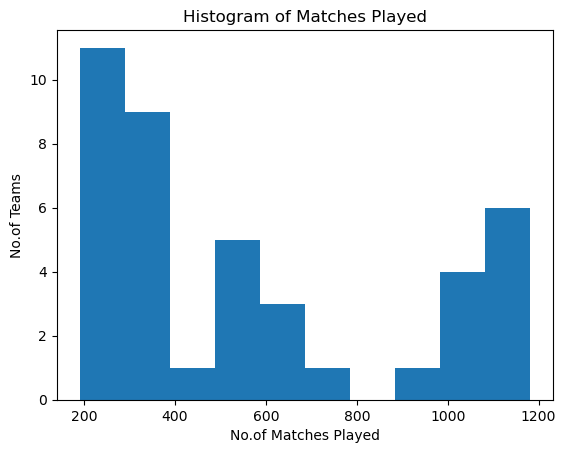

In [29]:
import matplotlib.pyplot as plt

# Plotting a histogram 
plt.hist(dataf['Matches Played'])

# Adding the lables and titles
plt.xlabel('No.of Matches Played')
plt.ylabel('No.of Teams')
plt.title('Histogram of Matches Played')

We can see from the histogram that a majority of teams have played less than 400 matches. However, there are a few teams that have played an exceptionally high number of matches, exceeding 900.

As per the project requirements, it is worth noting that some of the more established clubs have already been owned by the competitors. Therefore, the client is interested in identifying potential clubs that may perform well in the future, even if they have less experience in the Premier League.

In [30]:
# Identifying the teams that have played more than 900 matches

dataf[dataf['Matches Played']>=900]['Club']

0               Arsenal
1           Aston Villa
9               Chelsea
13              Everton
18            Liverpool
19      Manchester City
20    Manchester United
22     Newcastle United
29          Southampton
33    Tottenham Hotspur
36      West Ham United
Name: Club, dtype: object

Upon analysis, we have observed that there are a total of 11 clubs who have significantly more experience in the Premier League as compared to the others. These clubs have played a higher number of matches and have established themselves as experienced players in the league.

As per the client's requirements, we are interested in identifying potential clubs that may perform well in the future, even if they have less experience in the Premier League. Therefore, we have decided to drop these 11 clubs from our analysis, as their established presence in the league may skew our results and make it difficult to identify less experienced clubs with high potential.

By removing these clubs, we can focus our analysis on the remaining clubs and potentially identify hidden gems that may have been overlooked due to their lack of experience in the league.

In [31]:
dataf[dataf['Matches Played']<900]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up
2,Birmingham City,266,73,111,82,273,66,1875,0.0,0
3,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1
4,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0
5,Bournemouth,219,64,107,48,269,45,1899,0.0,0
6,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0
7,Burnley,304,83,145,76,300,78,1882,0.0,0
8,Charlton Athletic,304,93,129,82,342,91,1905,0.0,0
10,Coventry City,354,99,143,112,387,92,1883,0.0,0
11,Crystal Palace,532,153,241,138,576,133,1861,0.0,0
12,Derby County,266,68,128,70,271,66,1884,0.0,0


In [32]:
# Since we observe that index column has become incosistent, we now reset the index to make it consistent

dataf = dataf[dataf['Matches Played']<900].reset_index(drop = True)

In [33]:
# viewing the data

dataf.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0


In [35]:
# Shape of Data

dataf.shape

(30, 10)

In [36]:
# Analyzing other columns
# Win, Loss, Draw, Clean Sheets 


It is essential to understand that the values in all the columns represent the cumulative scores over all the matches played.

To accurately analyze the performance of the teams, we must normalize the data by dividing the no. of wins, loss, drawn, clean sheet, goals by the number of matches played.

This normalization will provide us with a fair idea of the winning, losing, draw, and clean sheet percentages of each team along with goals per match

In [42]:
dataf['Winning Rate']= (dataf['Win']/dataf['Matches Played'])*100
dataf['Loss Rate'] = (dataf['Loss']/dataf['Matches Played'])*100
dataf['Draw Rate'] = (dataf['Drawn']/dataf['Matches Played'])*100
dataf['Clean Sheet Rate'] = (dataf['Clean Sheets']/dataf['Matches Played'])*100

# Column for Average Goals Per Match

dataf['Avg Goals Per Match'] = (dataf['Goals']/dataf['Matches Played'])
dataf['Avg Goals Per Match'] = dataf['Avg Goals Per Match'].round()


In [43]:
dataf.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Draw Rate,Clean Sheet Rate,Avg Goals Per Match
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,27.443609,41.729323,30.827068,24.812030,1.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,37.643678,35.919540,26.436782,30.172414,1.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,30.161943,43.927126,25.910931,21.862348,1.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,29.223744,48.858447,21.917808,20.547945,1.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,27.981651,38.990826,33.027523,26.605505,1.0


New Columns are reflected in the dataframe

Text(0, 0.5, 'Rate')

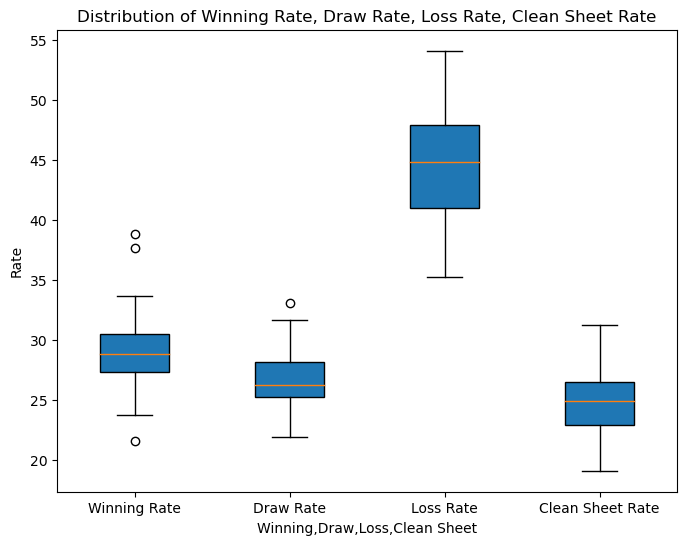

In [51]:
# Visualising the Winning Rate, Loss Rate, Draw Rate and Clean Sheet Rate

plt.figure(figsize=(8,6))

boxplot = plt.boxplot([dataf['Winning Rate'],dataf['Draw Rate'],dataf['Loss Rate'],dataf['Clean Sheet Rate']],
                      patch_artist=True,
                      labels=['Winning Rate','Draw Rate','Loss Rate','Clean Sheet Rate'])

#patch artist is to highlight the IQR

plt.title('Distribution of Winning Rate, Draw Rate, Loss Rate, Clean Sheet Rate')
plt.xlabel('Winning,Draw,Loss,Clean Sheet')
plt.ylabel('Rate')


#### Winning Rate
We observe that there are a few outliers in the Winning Rate boxplot, which are located above the upper whisker. It is safe to conclude that these outlier clubs have shown exceptional winning rates compared to the other clubs. Let us identify them ahead.

Also let us identify one outlier club with very low winning rate

#### Drawn Rate
We observe an outlier in the drawn rate boxplot, indicating that one particular club has a much higher drawn rate compared to others. This may not necessarily be a positive indication, as it suggests that the club may struggle to secure wins in their matches. Going further let us identify which club is this.

#### Loss Rate
We can see very clearly that loss rates for these clubs are high compared to winning rate.

#### Clean Sheet Rate
We see that data for Clean Sheet rate is pretty symmetric.

In [55]:
# Winning Rate further analysis. Identifying the Clubs with high Winning Rate

# Calculating the Inter Quartile Range for Winning Rate Column to identify exceptionally performing clubs
Q1 = dataf['Winning Rate'].quantile(0.25)
Q3 = dataf['Winning Rate'].quantile(0.75)

# InterQuartile Range
IQR = Q3-Q1

# Calculating Upper Boundary for Potential Outliers ==> Exceptionally High Winning Rate compared to other clubs
Upperbound  = Q3 + 1.5 * IQR

# Identifying the clubs with high winning rates

highwinrate = dataf[(dataf['Winning Rate'] > Upperbound)]
highwinrate


,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Draw Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,37.643678,35.919540,26.436782,30.172414,1.0
12,Leeds United,574,223,202,149,784,179,1919,0.0,0,38.850174,35.191638,25.958188,31.184669,1.0


Upon analyzing the data, we have found that two teams, Leeds United and Blackburn Rovers, have exceptionally high winning rates of 39% and 38% respectively.

In [56]:
# Winning Rate Further Analysis

lowerbound = Q1 - 1.5 * IQR

# Identifying the team with low Winning Rate

lowwinrate = dataf[(dataf['Winning Rate']<lowerbound)]
lowwinrate

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Draw Rate,Clean Sheet Rate,Avg Goals Per Match
29,Hull City,190,41,101,48,181,58,1904,NaN,0,21.578947,53.157895,25.263158,30.526316,1.0


Club is lowest winning rate of 22% is Hull City

In [57]:
# Drawn Rate further analysis 

Q1 = dataf['Draw Rate'].quantile(0.25)
Q3 = dataf['Draw Rate'].quantile(0.75)

IQR = Q3 - Q1

#Finding the upperbound ==> Clubs with high draw rate
upperbound = Q3 + 1.5 * IQR

# Clubs with high draw rate
highdrawrate = dataf[(dataf['Draw Rate'] > upperbound)]
highdrawrate


,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Draw Rate,Clean Sheet Rate,Avg Goals Per Match
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,27.981651,38.990826,33.027523,26.605505,1.0


Brighton & Hove Albion is expectionally high Drawn Rate of 33% which makes it undesirable to our client

In [58]:
# Analysing Avg Goals Per Match
dataf['Avg Goals Per Match'].describe()

count    30.0
mean      1.0
std       0.0
min       1.0
25%       1.0
50%       1.0
75%       1.0
max       1.0
Name: Avg Goals Per Match, dtype: float64

This metric does not provide much information, hence we won't be using in further analysis

In [66]:
# Exploring Winner and Runners Up columns

dataf['Winners'].value_counts()

0.0    28
1.0     2
Name: Winners, dtype: int64

In [60]:
dataf['Runners-up'].value_counts()

0    29
1     1
Name: Runners-up, dtype: Int64

We observe that out of the 30 clubs, only 2 clubs have won the Premier League, and one club has been a runner-up. Let us identify these clubs

In [69]:
dataf[(dataf['Winners']==1) | (dataf['Runners-up']==1)]

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Draw Rate,Clean Sheet Rate,Avg Goals Per Match
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,37.643678,35.919540,26.436782,30.172414,1.0
13,Leicester City,642,216,262,164,860,167,1884,1.0,0,33.644860,40.809969,25.545171,26.012461,1.0


Blackburn Rovers have won Premier League once and been an Runners-up once and Leicester City has won Premier League once.

In [70]:
# Analysing Matches Played Column for our reduced dataframe 

dataf['Matches Played'].describe()

count     30.000000
mean     370.600000
std      151.214987
min      190.000000
25%      266.000000
50%      310.500000
75%      494.000000
max      696.000000
Name: Matches Played, dtype: float64

Average matches played are 371.

## Final Recommendations Framework

Let's create a plan to Score each team on the pre defined metric.

* Give a score of 15 if club have a relatively high experience in the Premier League above average (371)
* Give a score of 15 if club has winning rate above Q3
* Give a score of 15 if club has lossing rate below Q1
* Give a score of 10 if club drawn rate below Q1 and losing rate is below Q1
* Give a score of 10 if club has clean sheet above Q3 and winning rate is above Q3
* Give a score of 20 if club has won premier league
* Give a score of 15 if club has been a runners-up in premier league

In [71]:
# Calculating the Upperbound for Winning Rate
upperbound_winningrate = dataf['Winning Rate'].quantile(0.75)

# Calculating the Lowerbound for Loss Rate
lowerbound_lossrate = dataf['Loss Rate'].quantile(0.25)

# Calculating the Lowerbound for Draw Rate
lowerbound_drawrate = dataf['Draw Rate'].quantile(0.25)

# Calculating the upperbound for Clean Sheet Rate
upperbound_cleansheetrate = dataf['Clean Sheet Rate'].quantile(0.75)



In [73]:
len(dataf)

30

In [127]:
# Initialising our Score Column with Zeros

dataf['Score'] = np.zeros(len(dataf))

In [128]:
dataf.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Draw Rate,Clean Sheet Rate,Avg Goals Per Match,Score
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,37.643678,35.919540,26.436782,30.172414,1.0,0.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,30.161943,43.927126,25.910931,21.862348,1.0,0.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,27.981651,38.990826,33.027523,26.605505,1.0,0.0


In [129]:
dataf.loc[dataf['Matches Played'] >= 371, 'Score']+=15
dataf.loc[(dataf['Winning Rate'] >= upperbound_winningrate), 'Score']+=15
dataf.loc[(dataf['Loss Rate']<=lowerbound_lossrate),'Score']+=15
dataf.loc[(dataf['Draw Rate']<=lowerbound_drawrate) & (dataf['Loss Rate']<=lowerbound_lossrate) ,'Score']+=10
dataf.loc[(dataf['Clean Sheet Rate']>=upperbound_cleansheetrate) & (dataf['Winning Rate']>=upperbound_winningrate),'Score']+=10
dataf.loc[dataf['Winners'] ==1,'Score'] +=20
dataf.loc[dataf['Runners-up'] ==1,'Score'] +=15

In [130]:
dataf.head()

,Club,Matches Played,Win,Loss,Drawn,Goals,Clean Sheets,TeamLaunch,Winners,Runners-up,Winning Rate,Loss Rate,Draw Rate,Clean Sheet Rate,Avg Goals Per Match,Score
0,Birmingham City,266,73,111,82,273,66,1875,0.0,0,27.443609,41.729323,30.827068,24.812030,1.0,0.0
1,Blackburn Rovers,696,262,250,184,927,210,1875,1.0,1,37.643678,35.919540,26.436782,30.172414,1.0,90.0
2,Bolton Wanderers,494,149,217,128,575,108,1874,0.0,0,30.161943,43.927126,25.910931,21.862348,1.0,15.0
3,Bournemouth,219,64,107,48,269,45,1899,0.0,0,29.223744,48.858447,21.917808,20.547945,1.0,0.0
4,Brighton & Hove Albion,218,61,85,72,243,58,1901,0.0,0,27.981651,38.990826,33.027523,26.605505,1.0,15.0


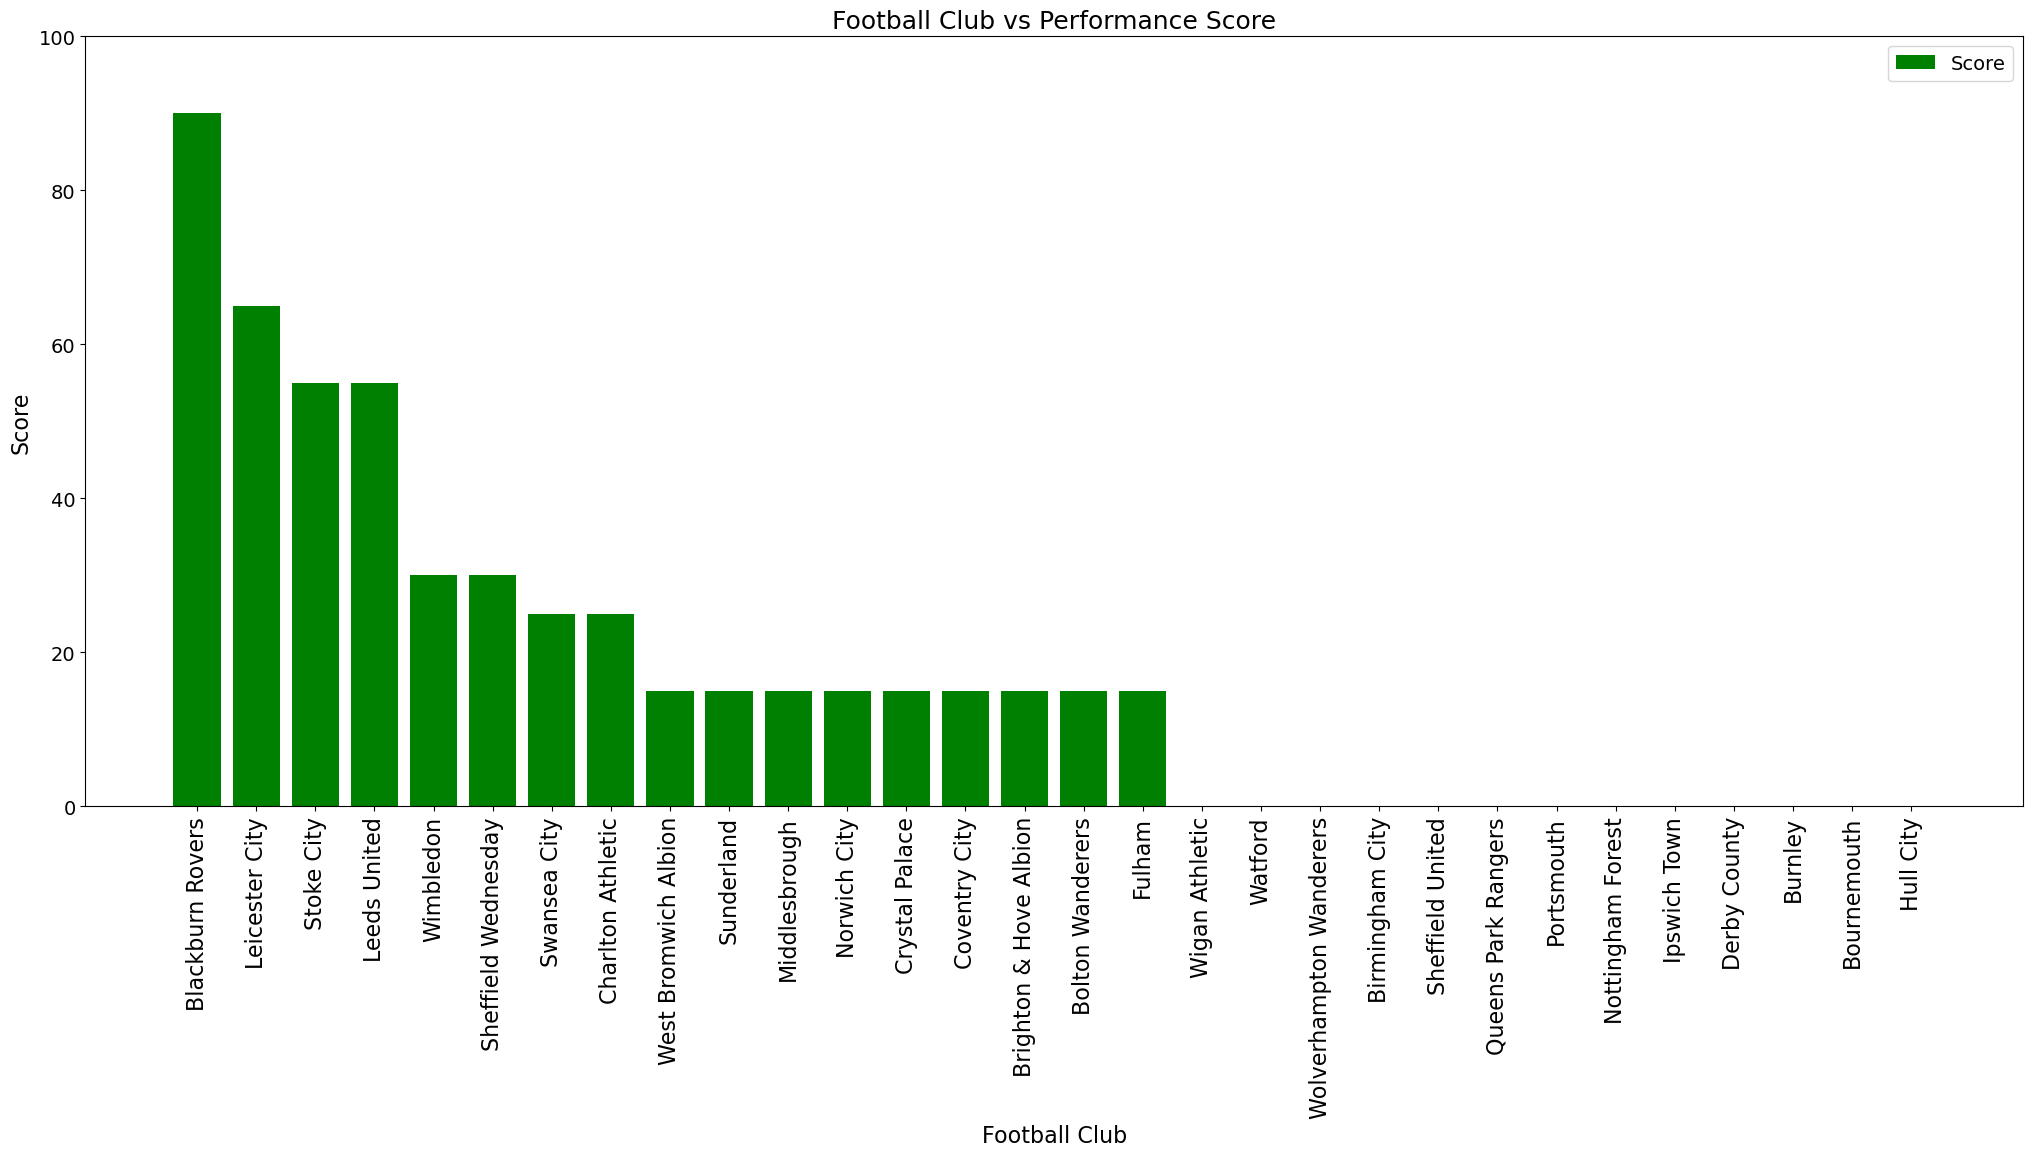

In [139]:
# Sorting the Dataframe in descending order 
dataf_sort = dataf.sort_values(by='Score', ascending=False)

# Creating a bar chart of team scores
plt.figure(figsize=(25,10))
plt.bar(dataf_sort['Club'],dataf_sort['Score'],color='Green')

plt.xlabel('Football Club', fontsize=16)
plt.ylabel('Score', fontsize=16)
plt.title('Football Club vs Performance Score', fontsize=18)

# Adding legend to explain the bars
plt.legend(['Score'], fontsize=14)

# Rotating the names on X-axis for readability
plt.xticks(rotation=90, fontsize=16)
plt.yticks(fontsize=14)

# Setting the Y-axis limit to 100
plt.ylim(0,100)

plt.show()



### We recommend investing in Blackburn Rovers as it has the highest score basis our analysis and next best is Leicester City.

